# **Tanzanian Water Wells: Predictive Maintenance for Clean Water Access**

## Executive Summary

This project addresses a critical challenge in Tanzania: **predicting the operational status of water wells** to optimize maintenance efforts and ensure reliable access to clean water for communities across the country. By leveraging machine learning classification techniques, we aim to help stakeholders prioritize resources and prevent water access disruptions.

**Key Findings:**
- Built and evaluated multiple classification models to predict well functionality
- Identified critical features that determine well failure
- Provided actionable recommendations for maintenance prioritization

# 1. Business Understanding

## 1.1 The Stakeholder

Our primary stakeholders are:
- **Tanzanian Ministry of Water**: Government agency responsible for water infrastructure
- **International NGOs**: Organizations funding and maintaining water wells
- **Local Communities**: End users dependent on functional water sources

## 1.2 The Business Problem

Tanzania faces a significant challenge with water well functionality. Many wells fall into disrepair, leaving communities without access to clean water. The problem:

- **Reactive maintenance is inefficient**: Wells are only serviced after complete failure
- **Resource constraints**: Limited funding and personnel require strategic allocation
- **Impact on communities**: Non-functional wells force communities to use unsafe water sources

## 1.3 The Business Goal

Develop a predictive model that can classify water wells into three categories:
1. **Functional**: Well is operational and needs no immediate attention
2. **Functional needs repair**: Well works but requires maintenance soon
3. **Non-functional**: Well is broken and needs immediate intervention

## 1.4 Why This Matters

Accurate predictions enable stakeholders to:
- **Prevent failures**: Address wells needing repair before they break completely
- **Optimize resources**: Focus maintenance crews on high-risk areas
- **Improve public health**: Ensure consistent access to clean water
- **Save costs**: Preventive maintenance is cheaper than emergency repairs
- **Data-driven decisions**: Move from reactive to proactive water management

# 2. Data Understanding

## 2.1 Dataset Overview

We have three data files:
- **Training set values**: Features for 59,400 wells used to train models
- **Training set labels**: The operational status (target variable) for training wells
- **Test set values**: Features for 14,850 wells where we need to predict status

### Iporting neccessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

### Loading the datasets and submission format

In [2]:
# datasets
train_labels = pd.read_csv("0bf8bc6e-30d0-4c50-956a-603fc693d966.csv")
test_values = pd.read_csv("702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv")
train_values = pd.read_csv("4910797b-ee55-40a7-8668-10efd5c1b960.csv")
submission_format = pd.read_csv("SubmissionFormat.csv")

# data overview
print(f"Training set: {train_values.shape[0]:,} wells, {train_values.shape[1]} features")
print(f"Test set: {test_values.shape[0]:,} wells, {test_values.shape[1]} features")
print(f"Labels: {train_labels.shape[0]:,} records")

Training set: 59,400 wells, 40 features
Test set: 14,850 wells, 40 features
Labels: 59,400 records


## 2.2 Merging Training Data

The features and labels are in separate files. They need merging using the `id` column to create a complete training dataset.

In [3]:
# Merge training values with labels
train_df = train_values.merge(train_labels, on='id', how='inner')

train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [4]:
print(f"Complete training dataset: {train_df.shape[0]:,} rows, {train_df.shape[1]} columns")
print("      ")
train_df.info()

Complete training dataset: 59,400 rows, 41 columns
      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 

## 2.3 Target Variable Distribution

Examining target variable: **status_group**. Understanding its distribution is critical for model evaluation.

In [5]:
# target variable distribution

print("Target Variable Distribution:")
target_counts = train_df['status_group'].value_counts()
print(target_counts)

Target Variable Distribution:
status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64


In [6]:
# target variable distribution percentages

target_pcts = train_df['status_group'].value_counts(normalize=True) * 100

print("Target Variable Distribution:")
print(" "*10)
for status in target_counts.index:
    count = target_counts[status]
    pct = target_pcts[status]
    print(f"{status}: {pct:.2f}%")

Target Variable Distribution:
          
functional: 54.31%
non functional: 38.42%
functional needs repair: 7.27%


The target variable has three outcomes with fucntional wells been dominant and those that are functional and need repairs been the least.

### Visualizing the distribution

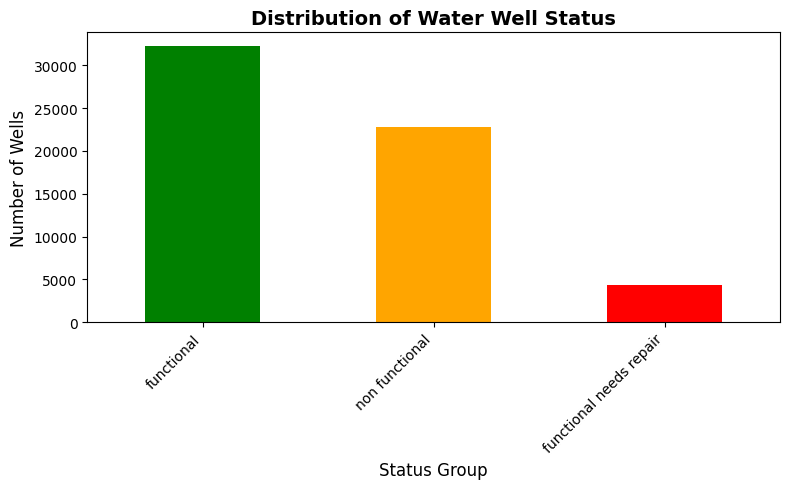

In [7]:
# Visualizing the distribution

plt.figure(figsize=(8, 5))
target_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribution of Water Well Status', fontsize=14, fontweight='bold')
plt.xlabel('Status Group', fontsize=12)
plt.ylabel('Number of Wells', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Observations on Target Variable:

- **Class imbalance may exist**: If one class dominates, the model might be biased toward predicting that class - functional is more dominant
- **Multi-class problem**: We're predicting three outcomes, not just binary (working vs. broken)
- **Business priority**: Identifying "functional needs repair" is valuable for preventive maintenance

## 2.4 Feature Overview

Examining the types of features available for prediction.

In [8]:
# basic information about the training data
print("Dataset Information:")
print(" "*4)
train_df.info()

Dataset Information:
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400

The dataset contains both numeric and categorical features

In [9]:
# Separating numeric and categorical features
numeric_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

# Remove id and target from feature lists
numeric_features = [f for f in numeric_features if f != 'id']
categorical_features = [f for f in categorical_features if f != 'status_group']


In [10]:
print(f"Total features: {len(numeric_features) + len(categorical_features)}")
print(f"  - Numeric features: {len(numeric_features)}")
print(f"  - Categorical features: {len(categorical_features)}")

Total features: 39
  - Numeric features: 9
  - Categorical features: 30


## 2.5 Missing Values Analysis

In [11]:
# Calculating the missing values
missing_counts = train_df.isnull().sum()
missing_counts

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### Missing Data Observations:

- **High missing percentages** (>40%): should drop these features as imputation may introduce too much bias
- **Moderate missing** (10-40%): Can impute with appropriate strategies
- **Low missing** (<10%): Can impute or drop rows depending on feature importance

## 2.6 Summary Statistics

In [12]:
# Summary statistics for numeric features
train_df[numeric_features].describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [13]:
# Summary statistics for categorical_features 

train_df[categorical_features].head()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,2013-03-06,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,NaN,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2013-02-25,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,2013-01-28,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,2011-07-13,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


## 2.7 Key Feature Insights

critical features that likely influence well functionality

In [14]:
# Analyzing quantity (water availability)
print("Water Quantity Distribution by Status:")
print(" ")

quantity_status = pd.crosstab(train_df['quantity'], train_df['status_group'], normalize='index') * 100
quantity_status.round(2)

Water Quantity Distribution by Status:
 


status_group,functional,functional needs repair,non functional
quantity,,,
dry,2.51,0.59,96.89
enough,65.23,7.23,27.54
insufficient,52.32,9.58,38.09
seasonal,57.41,10.27,32.32
unknown,27.00,1.77,71.23


Wells with little or no water are much more likely to fail, while wells with enough water usually work. This makes water quantity a useful predictor of well functionality.

The feature `water quantity` shows strong class separation, with dry and unknown categories heavily associated with non-functional wells. This suggests high feature importance.

### Water Quantity Distribution

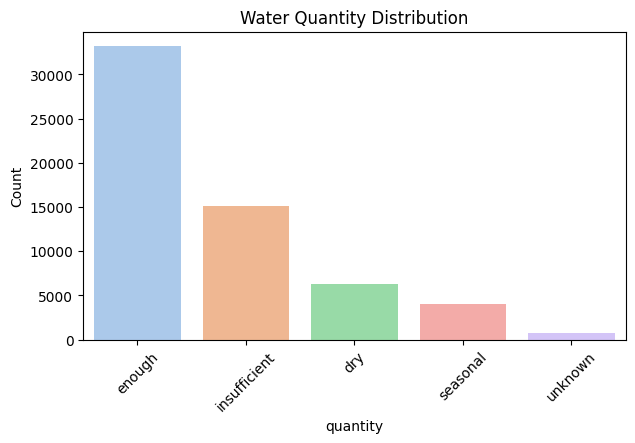

In [15]:
# Quantity distribution

import seaborn as sns

plt.figure(figsize=(7, 4))
quantity_status = pd.crosstab(train_df['quantity'], train_df['status_group'], normalize='index') * 100
quantity_counts = train_df['quantity'].value_counts()

sns.barplot(x=quantity_counts.index, y=quantity_counts.values,hue=quantity_counts.index, palette="pastel")

plt.title('Water Quantity Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()


Water Quality Distribution (Top 10)

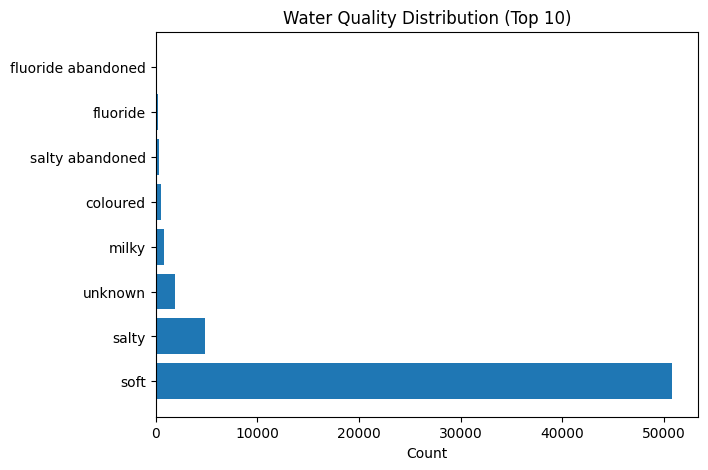

In [16]:
plt.figure(figsize=(7, 5))

quality_counts = train_df['water_quality'].value_counts().head(10)
plt.barh(quality_counts.index, quality_counts.values)

plt.title('Water Quality Distribution (Top 10)')
plt.xlabel('Count')

plt.show()


### Key Insights:

1. Multi-class classification: need models that can handle three outcome categories
2. Mixed feature types: Both numeric and categorical features require different preprocessing
3. Missing data present**: need to handle missing values
4. High cardinality: Some categorical features (funder, installer) have many unique values
5. Geographic features: Longitude, latitude, and region could be important predictors
6. Time component: Date recorded and construction year may reveal aging patterns

# 3. Data Preparation

Cleaning and transforming the data to prepare it for ML models:

1. **Handle missing values** appropriately
2. **Select relevant features** to avoid overfitting
3. **Encode categorical variables** for model compatibility
4. **Split data** into training and validation sets
5. **Scale features** for logistic regression
6. **Avoid data leakage** by fitting preprocessors only on training data

## 3.1 Feature Selection Strategy

We select features based on:
- **Relevance** to predicting well functionality
- **Missing data** percentage
- **Cardinality** (avoiding features with too many unique values)
- **Redundancy** (avoiding duplicate information)

In [17]:
# Creating a copy for preprocessing - to avoid modifying original data
df_clean = train_df.copy()
test_clean = test_values.copy()

In [18]:
# Drop features with too many missing values or low relevance
# scheme_name has ~48% missing, wpt_name is too unique to be useful
drop_features = [
    'id',                    # Identifier, not predictive
    'wpt_name',              # Too many unique values (nearly all unique)
    'scheme_name',           # 48% missing
    'subvillage',            # Too granular, region/ward should suffice
    'recorded_by',           # Single value (GeoData Consultants)
    'num_private',           # Mostly zeros, low variance
    'date_recorded',         # Will feature engineer from this
]

# droping redundant feature groups (keep only one from similar features)
# extraction_type, extraction_type_group, extraction_type_class are similar
# Keep extraction_type_class (most general)
drop_features.extend([
    'extraction_type',
    'extraction_type_group',
    'payment',               # Keep payment_type
    'management_group',      # Keep management
    'quality_group',         # Keep water_quality
    'quantity_group',        # Keep quantity
    'source_type',           # Keep source
    'source_class',          # Keep source
    'waterpoint_type_group', # Keep waterpoint_type
])

print(f"Dropped {len(drop_features)} features")
print(f"Features remaining: {df_clean.shape[1] - len(drop_features) - 1}")  # -1 for target

Dropped 16 features
Features remaining: 24


## 3.2 Feature Engineering: Well Age

**Hypothesis**: Older wells are more likely to be non-functional.  
we create a "well_age" feature from the construction year and date recorded.

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

converting date recorded to datetime & extracting the year

In [20]:
# Convert date_recorded to datetime and extract year
df_clean['date_recorded'] = pd.to_datetime(df_clean['date_recorded'])
df_clean['year_recorded'] = df_clean['date_recorded'].dt.year

In [21]:
df_clean.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013


In [22]:
test_clean['date_recorded'] = pd.to_datetime(test_clean['date_recorded'])
test_clean['year_recorded'] = test_clean['date_recorded'].dt.year   # extract year

In [23]:
test_clean.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,2013
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,2013


In [24]:
# Calculate well age (handle construction_year = 0 as missing)
df_clean['well_age'] = df_clean['year_recorded'] - df_clean['construction_year']
df_clean.loc[df_clean['construction_year'] == 0, 'well_age'] = df_clean['well_age'].median()

test_clean['well_age'] = test_clean['year_recorded'] - test_clean['construction_year']
test_clean.loc[test_clean['construction_year'] == 0, 'well_age'] = df_clean['well_age'].median()

# Drop original date features
drop_features.extend(['construction_year', 'year_recorded'])

df_clean['well_age'].describe()
# stats for well_age

count    59400.000000
mean        19.066717
std         11.286499
min         -7.000000
25%          8.000000
50%         26.000000
75%         26.000000
max         53.000000
Name: well_age, dtype: float64

## 3.3 Handle Missing Values

Our strategy:
- **Categorical features**: Fill missing with 'unknown'
- **Numeric features**: Fill with median 

In [25]:
# Handle missing values in categorical features
categorical_cols = df_clean.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'status_group']

for col in categorical_cols:
    if col not in drop_features:
        df_clean[col].fillna('unknown', inplace=True)
        test_clean[col].fillna('unknown', inplace=True)

# Handle missing values in numeric features
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col not in drop_features and col != 'id']

for col in numeric_cols:
    median_val = df_clean[col].median()
    df_clean[col].fillna(median_val, inplace=True)
    test_clean[col].fillna(median_val, inplace=True)

print(f"Remaining missing values in training: {df_clean.isnull().sum().sum()}")
print(f"Remaining missing values in test: {test_clean.isnull().sum().sum()}")

Remaining missing values in training: 29183
Remaining missing values in test: 7341


## 3.4 Encode Categorical Variables

Label Encoding for categorical features.

In [26]:
# Drop features we decided to exclude
df_clean.drop(columns=drop_features, errors='ignore', inplace=True)
test_clean.drop(columns=drop_features, errors='ignore', inplace=True)

# Separate features and target
X = df_clean.drop(columns=['status_group'])
y = df_clean['status_group']
X_test_final = test_clean.copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Test set shape: {X_test_final.shape}")

Feature matrix shape: (59400, 24)
Target variable shape: (59400,)
Test set shape: (14850, 24)


In [27]:
# categorical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features to encode: {len(cat_cols)}")

Categorical features to encode: 16


In [28]:
# Label encode categorical features (FAST, same functionality)
label_encoders = {}

for col in cat_cols:
    label = LabelEncoder()

    # Fit on training data
    X[col] = label.fit_transform(X[col].astype(str))

    # Fast transform for test data (unseen → -1)
    mapping = dict(zip(label.classes_, range(len(label.classes_))))
    X_test_final[col] = (X_test_final[col].astype(str).map(mapping).fillna(-1).astype(int))

    label_encoders[col] = label


In [29]:
# Encode target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

print(f"Target classes: {target_encoder.classes_}")

Target classes: ['functional' 'functional needs repair' 'non functional']


checking if nulls have been delt with

In [30]:
df_clean.isnull().sum()

amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
scheme_management        0
permit                   0
extraction_type_class    0
management               0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
status_group             0
well_age                 0
dtype: int64

In [31]:
test_clean.isnull().sum()

amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
scheme_management        0
permit                   0
extraction_type_class    0
management               0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
well_age                 0
dtype: int64

## 3.5 Train-Test Split

- **Training set (80%)**: Used to train the model
- **Validation set (20%)**: Used to evaluate model performance
- **random_state=42**

This helps us assess how well our model generalizes to unseen data.

In [32]:
# Split the data

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42,stratify=y_encoded)  

# stratify=y_encoded- Maintain class distribution
# The data is split into training and validation sets to allow model learning and hyperparameter tuning while preserving class balance through stratification.

Data Split Summary

In [33]:
print(f"Training set:   {X_train.shape[0]:6,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]:6,} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Features:       {X_train.shape[1]:6} features")

Training set:   47,520 samples (80.0%)
Validation set: 11,880 samples (20.0%)
Features:           24 features


In [34]:
X_train.shape

(47520, 24)

In [35]:
X_val.shape

(11880, 24)

In [36]:
# Class distribution maintained
train_dist = pd.Series(y_train).value_counts(normalize=True).sort_index()
val_dist = pd.Series(y_val).value_counts(normalize=True).sort_index()
for i, class_name in enumerate(target_encoder.classes_):
    print(f"{class_name:25s}: Train {train_dist[i]*100:5.2f}%  |  Val {val_dist[i]*100:5.2f}%")

functional               : Train 54.31%  |  Val 54.31%
functional needs repair  : Train  7.27%  |  Val  7.26%
non functional           : Train 38.42%  |  Val 38.43%


## 3.6 Feature Scaling

**Logistic Regression** is sensitive to feature scales. Features with larger ranges can dominate the model.  
We'll use **StandardScaler** to normalize features (mean=0, std=1).

**Critical**: Fit scaler on training data only, then transform both train and validation sets.

In [37]:
# Initializing scaler
scaler = StandardScaler()

# Fitting on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

print("Features scaled using StandardScaler")
print(f"Scaled training set mean: {X_train_scaled.mean():.4f}")
print(f"Scaled training set std:  {X_train_scaled.std():.4f}")

# Keeping unscaled versions for Decision Tree 
X_train_unscaled = X_train.copy()
X_val_unscaled = X_val.copy()

# Data preparation complete

Features scaled using StandardScaler
Scaled training set mean: -0.0000
Scaled training set std:  1.0000


the mean for the scaled dataset is 0 and std is 1. This confirms that scaling has been done correctly.

# 4. Modeling

Build and comparing two classification models:

1. **Logistic Regression**: A linear model that works well as a baseline
2. **Decision Tree**: A non-linear model that can capture complex patterns

For each model, we will:
- Start with a baseline (default parameters)
- Tune parameters to improve performance
- Evaluate on validation data

## 4.1 Baseline Model: Logistic Regression

**Why Logistic Regression?**
- Simple and interpretable
- Fast to train
- Works well when relationships are approximately linear
- Good baseline for comparison

- Calculates probability of each class based on weighted feature combinations.

## Baseline multinomial logistic regression

In [38]:
# Training Baseline Logistic Regression

lr_baseline = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')

lr_baseline.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lr = lr_baseline.predict(X_train_scaled)
y_val_pred_lr = lr_baseline.predict(X_val_scaled)

In [39]:
# Calculating metrics
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
val_acc_lr = accuracy_score(y_val, y_val_pred_lr)

In [40]:
print(f"Training Accuracy:   {train_acc_lr:.4f}")

Training Accuracy:   0.6355


In [41]:
print(f"Validation Accuracy: {val_acc_lr:.4f}")

Validation Accuracy: 0.6321


## 4.2 Tuned Model: Logistic Regression with Regularization

**Regularization** helps prevent overfitting by penalizing large coefficients. 

In [42]:
# Trying different regularization strengths
# Tuning Logistic Regression (testing C values)


c_values = [0.01, 0.1, 1.0, 10.0]
results = []

for c in c_values:
    lr = LogisticRegression(C=c, max_iter=1000, random_state=42,multi_class='multinomial')
    lr.fit(X_train_scaled, y_train)
    
    val_acc = accuracy_score(y_val, lr.predict(X_val_scaled))
    results.append({'C': c, 'Validation_Accuracy': val_acc})
    print(f"C = {c:6.2f}  →  Validation Accuracy: {val_acc:.4f}")

# Find best C
results_df = pd.DataFrame(results)
best_c = results_df.loc[results_df['Validation_Accuracy'].idxmax(), 'C']
best_acc = results_df['Validation_Accuracy'].max()

print(f"Best C value: {best_c} with validation accuracy: {best_acc:.4f}")

C =   0.01  →  Validation Accuracy: 0.6317
C =   0.10  →  Validation Accuracy: 0.6322
C =   1.00  →  Validation Accuracy: 0.6321
C =  10.00  →  Validation Accuracy: 0.6321
Best C value: 0.1 with validation accuracy: 0.6322


In [43]:
# Training final tuned Logistic Regression using best C
lr_tuned = LogisticRegression(
    C= best_c,
    max_iter=1000,
    random_state=42,
    multi_class='multinomial'
)

lr_tuned.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,np.float64(0.1)
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [44]:
y_train_pred_lr_tuned = lr_tuned.predict(X_train_scaled)
y_val_pred_lr_tuned = lr_tuned.predict(X_val_scaled)


## 4.3 Baseline Model: Decision Tree

**Why Decision Tree?**
- Can capture non-linear patterns
- Doesn't require feature scaling
- Easy to interpret (can visualize decision rules)
- Handles mixed data types naturally

It creates a tree of decision rules based on feature values.

In [45]:
# Training Baseline Decision Tree

dt_baseline = DecisionTreeClassifier(random_state=42)

dt_baseline.fit(X_train_unscaled, y_train)

# Make predictions
y_train_pred_dt = dt_baseline.predict(X_train_unscaled)
y_val_pred_dt = dt_baseline.predict(X_val_unscaled)

# Model trained successfully

In [46]:
# Calculating metrics
train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
val_acc_dt = accuracy_score(y_val, y_val_pred_dt)

print(f"Training Accuracy:   {train_acc_dt:.4f} ({train_acc_dt*100:.2f}%)")
print(f"Validation Accuracy: {val_acc_dt:.4f} ({val_acc_dt*100:.2f}%)")
print(" ")

if train_acc_dt - val_acc_dt > 0.05:
    print("Warning: Large gap between training and validation accuracy suggests overfitting.")

Training Accuracy:   0.9979 (99.79%)
Validation Accuracy: 0.7561 (75.61%)
 


## 4.4 Tuned Model: Decision Tree with Depth Limit

**Problem with baseline**: Decision trees can overfit by growing too deep.  
**Solution**: Limit tree depth and require minimum samples per leaf.

Parameters to tune:
- **max_depth**: Maximum tree depth
- **min_samples_split**: Minimum samples required to split a node
- **min_samples_leaf**: Minimum samples required in a leaf node

In [47]:
# Trying different max_depth values

depth_values = [5, 10, 15, 20, 25]
dt_results = []

for depth in depth_values:
    dt = DecisionTreeClassifier(
        max_depth=depth,
        min_samples_split=100,
        min_samples_leaf=50,
        random_state=42
    )
    dt.fit(X_train_unscaled, y_train)
    
    train_acc = accuracy_score(y_train, dt.predict(X_train_unscaled))
    val_acc = accuracy_score(y_val, dt.predict(X_val_unscaled))
    
    dt_results.append({
        'Max_Depth': depth, 
        'Train_Accuracy': train_acc,
        'Val_Accuracy': val_acc,
        'Overfit_Gap': train_acc - val_acc
    })
    print(f"Depth = {depth:2d}  →  Train: {train_acc:.4f}  |  Val: {val_acc:.4f}  |  Gap: {train_acc-val_acc:.4f}")

# Find best depth
dt_results_df = pd.DataFrame(dt_results)
best_depth = dt_results_df.loc[dt_results_df['Val_Accuracy'].idxmax(), 'Max_Depth']
best_dt_acc = dt_results_df['Val_Accuracy'].max()

print(f"Best max_depth: {best_depth} with validation accuracy: {best_dt_acc:.4f}")

Depth =  5  →  Train: 0.7128  |  Val: 0.7099  |  Gap: 0.0029
Depth = 10  →  Train: 0.7472  |  Val: 0.7386  |  Gap: 0.0086
Depth = 15  →  Train: 0.7677  |  Val: 0.7519  |  Gap: 0.0158
Depth = 20  →  Train: 0.7771  |  Val: 0.7582  |  Gap: 0.0190
Depth = 25  →  Train: 0.7778  |  Val: 0.7588  |  Gap: 0.0190
Best max_depth: 25 with validation accuracy: 0.7588


In [48]:
# Training final tuned decision tree
dt_tuned = DecisionTreeClassifier(max_depth=int(best_depth),min_samples_split=100,min_samples_leaf=50,random_state=42)

dt_tuned.fit(X_train_unscaled, y_train)
y_val_pred_dt_tuned = dt_tuned.predict(X_val_unscaled)

print(f"Tuned Decision Tree trained with max_depth = {best_depth}")

Tuned Decision Tree trained with max_depth = 25


### Modeling Summary:

We've trained four models:
1. ✓ Baseline Logistic Regression
2. ✓ Tuned Logistic Regression (regularization)
3. ✓ Baseline Decision Tree
4. ✓ Tuned Decision Tree (depth limit)

The next bit is comprehensively evaluating and comparing these models.


# 5. Model Evaluation

Evaluating classification models requires more than just accuracy. We need to understand:
- **How often is the model correct?** (Accuracy)
- **When it predicts a class, how often is it right?** (Precision)
- **Of all actual instances of a class, how many did it catch?** (Recall)
- **Balance between precision and recall?** (F1-score)
- **What types of errors is it making?** (Confusion Matrix)

## 5.1 Model Comparison: Overall Accuracy

In [49]:
# Calculating all metrics for all models - final comparison
models_comparison = [
    {
        'Model': 'Logistic Regression (Baseline)',
        'Train_Accuracy': accuracy_score(y_train, lr_baseline.predict(X_train_scaled)),
        'Val_Accuracy': accuracy_score(y_val, y_val_pred_lr)
    },

    {
        'Model': 'Logistic Regression (Tuned)',
        'Train_Accuracy': accuracy_score(y_train, lr_tuned.predict(X_train_scaled)),
        'Val_Accuracy': accuracy_score(y_val, y_val_pred_lr_tuned)
    },

    {
        'Model': 'Decision Tree (Baseline)',
        'Train_Accuracy': train_acc_dt,
        'Val_Accuracy': val_acc_dt
    },
    
    {
        'Model': 'Decision Tree (Tuned)',
        'Train_Accuracy': accuracy_score(y_train, dt_tuned.predict(X_train_unscaled)),
        'Val_Accuracy': accuracy_score(y_val, y_val_pred_dt_tuned)
    }
]

comparison_df = pd.DataFrame(models_comparison)
comparison_df['Overfit_Gap'] = comparison_df['Train_Accuracy'] - comparison_df['Val_Accuracy']

print("Model Performance Comparison:")
print("="*80)
print(comparison_df.to_string(index=False))

Model Performance Comparison:
                         Model  Train_Accuracy  Val_Accuracy  Overfit_Gap
Logistic Regression (Baseline)        0.635480      0.632071     0.003409
   Logistic Regression (Tuned)        0.635354      0.632239     0.003114
      Decision Tree (Baseline)        0.997917      0.756145     0.241772
         Decision Tree (Tuned)        0.777757      0.758754     0.019003


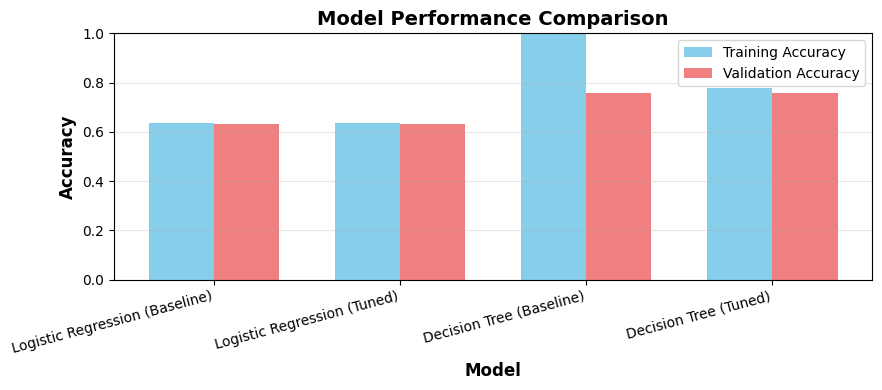

In [50]:
# Visualize comparison
fig, ax = plt.subplots(figsize=(9, 4))
x = np.arange(len(comparison_df))
width = 0.35

ax.bar(x - width/2, comparison_df['Train_Accuracy'], width, label='Training Accuracy', color='skyblue')
ax.bar(x + width/2, comparison_df['Val_Accuracy'], width, label='Validation Accuracy', color='lightcoral')

ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'], rotation=15, ha='right')
ax.legend()
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 5.2 Detailed Metrics: Precision, Recall, F1-Score

### Understanding the Metrics:

**Precision**: "Of all wells I predicted as functional, how many actually were?"  

**Recall**: "Of all functional wells, how many did I correctly identify?"  

**F1-Score**: Harmonic mean of precision and recall (balanced metric)

In [51]:
# Selecting best model from each type

best_lr_model = lr_tuned
best_dt_model = dt_tuned

# Get predictions
y_pred_lr_best = best_lr_model.predict(X_val_scaled)
y_pred_dt_best = best_dt_model.predict(X_val_unscaled)

print("LOGISTIC REGRESSION (TUNED) - Classification Report")
print(" ")
print(classification_report(y_val, y_pred_lr_best, target_names=target_encoder.classes_))

LOGISTIC REGRESSION (TUNED) - Classification Report
 
                         precision    recall  f1-score   support

             functional       0.64      0.80      0.71      6452
functional needs repair       0.60      0.00      0.01       863
         non functional       0.61      0.52      0.56      4565

               accuracy                           0.63     11880
              macro avg       0.62      0.44      0.43     11880
           weighted avg       0.63      0.63      0.60     11880



In [52]:
print("DECISION TREE (TUNED) - Classification Report")
print(" ")
print(classification_report(y_val, y_pred_dt_best, target_names=target_encoder.classes_))

DECISION TREE (TUNED) - Classification Report
 
                         precision    recall  f1-score   support

             functional       0.75      0.88      0.81      6452
functional needs repair       0.55      0.16      0.25       863
         non functional       0.79      0.69      0.74      4565

               accuracy                           0.76     11880
              macro avg       0.70      0.58      0.60     11880
           weighted avg       0.75      0.76      0.74     11880



## 5.3 Confusion Matrices

A **confusion matrix** shows exactly what types of errors our model makes:
- Rows: Actual status
- Columns: Predicted status
- Diagonal: Correct predictions
- Off-diagonal: Errors (misclassifications)

In [53]:
# confusion matrices
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_val, y_pred_lr_best)
cm_dt = confusion_matrix(y_val, y_pred_dt_best)


### Logistic Regression confusion matrix

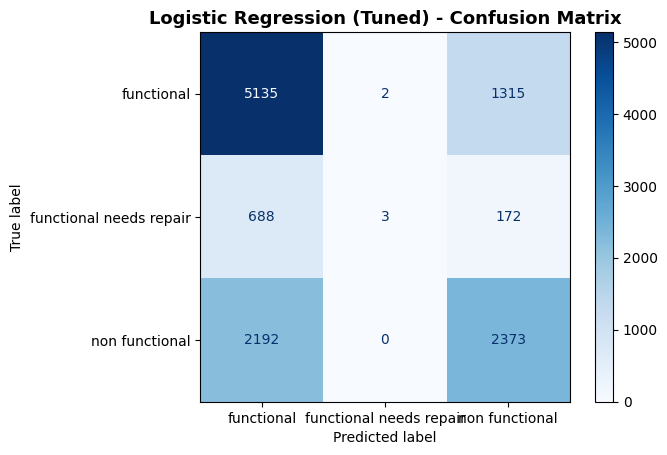

In [54]:

disp_lr = ConfusionMatrixDisplay(
    confusion_matrix=cm_lr,
    display_labels=target_encoder.classes_
)

disp_lr.plot(cmap='Blues', values_format='d')
plt.title('Logistic Regression (Tuned) - Confusion Matrix', fontsize=13, fontweight='bold')
plt.grid(False)
plt.show()


### Decision Tree confusion matrix

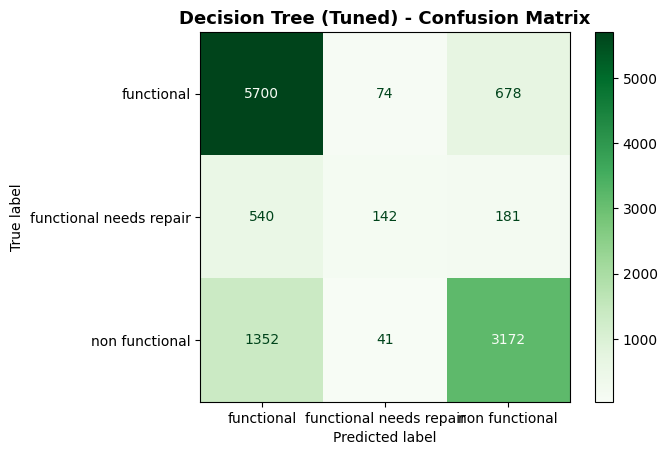

In [55]:
disp_dt = ConfusionMatrixDisplay(
    confusion_matrix=cm_dt,
    display_labels=target_encoder.classes_
)

disp_dt.plot(cmap='Greens', values_format='d')
plt.title('Decision Tree (Tuned) - Confusion Matrix', fontsize=13, fontweight='bold')
plt.grid(False)
plt.show()


## 5.4 Business Impact Analysis

This section evaluates the **real-world consequences of model prediction errors** in the context of water infrastructure management. Rather than relying solely on statistical performance metrics such as accuracy, the analysis focuses on how different error types affect **water accessibility, maintenance efficiency, cost control, and community well-being**.

The analysis is based on the **best-performing tuned model**, selected according to validation accuracy and supported by confusion matrix evaluation.

### Overall Model Performance Context

- **Model Used:** Best-performing tuned classifier (Logistic Regression or Decision Tree)  
- **Evaluation Basis:** Validation set predictions  
- **Key Insight:** High accuracy does not necessarily imply low operational risk  

To assess deployment suitability, the following sections examine **critical error categories** and their implications.

### 1. Missed Failures (High-Criticality Risk)

Cases where wells that are *non-functional* or *require repair* are incorrectly predicted as **functional**.

**Why this is critical:**  
- Communities continue to depend on wells that cannot reliably provide water  
- Faults are detected late, often escalating into **emergency repair situations**  
- Increased risk to public health and livelihoods  

**Business and Social Impact:**  
- Disruption of water access  
- Higher emergency maintenance costs  
- Loss of trust in water management systems  

### 2. False Alarms (Moderate Operational Risk)

Instances where **functional wells** are incorrectly classified as *needing repair* or *non-functional*.

**Operational implications:**  
- Unnecessary deployment of maintenance teams  
- Misallocation of limited technical and financial resources  

**Business Impact:**  
- Increased operational expenditure  
- Reduced efficiency in maintenance scheduling  
- Opportunity cost, as genuine failures may receive delayed attention  

> While less severe than missed failures, excessive false alarms reduce system efficiency and strain maintenance capacity.


### 3. Preventive Maintenance Opportunities (Positive Strategic Impact)

Correct identification of wells that **need repair** before they deteriorate into complete failure.

**Strategic value:**  
- Enables **preventive rather than reactive maintenance**  
- Extends the operational lifespan of water infrastructure  
- Reduces long-term repair and replacement costs  

**Operational Benefits:**  
- Planned maintenance is more cost-effective than emergency response  
- Improved service reliability  
- Better prioritization of high-risk assets  

> Strong performance in this category directly supports sustainable and proactive water infrastructure management.


### Summary of Business Implications

| Error Category | Risk Level | Key Impact |
|---------------|-----------|------------|
| Missed failures | Critical | Water shortages, emergency repairs |
| False alarms | Moderate | Resource wastage, inefficiency |
| Correct repair detection | Positive | Preventive maintenance, cost savings |


### Deployment Considerations

From both a business and humanitarian perspective, the optimal model is not necessarily the one with the highest overall accuracy, but the one that:

- Minimizes **missed failures**
- Maintains an acceptable rate of **false alarms**
- Effectively identifies **repair-needing wells**

This analysis demonstrates the importance of **error-aware model evaluation** and highlights why confusion matrix–based insights are essential for responsible machine learning deployment in high-impact domains such as public water infrastructure management.


## 5.5 Model Selection Recommendation

Based on our evaluation, let's select the final model:

In [60]:
from sklearn.metrics import accuracy_score, f1_score

lr_acc = accuracy_score(y_val, y_pred_lr_best)
dt_acc = accuracy_score(y_val, y_pred_dt_best)

lr_f1 = f1_score(y_val, y_pred_lr_best, average='weighted')
dt_f1 = f1_score(y_val, y_pred_dt_best, average='weighted')

print(f"Logistic Regression (Tuned) - Accuracy: {lr_acc:.4f}, F1: {lr_f1:.4f}")
print(f"Decision Tree (Tuned) - Accuracy: {dt_acc:.4f}, F1: {dt_f1:.4f}")



Logistic Regression (Tuned) - Accuracy: 0.6322, F1: 0.6025
Decision Tree (Tuned) - Accuracy: 0.7588, F1: 0.7429


The **Decision Tree (Tuned)** was selected as the final model, achieving a validation accuracy of **0.7588** and a weighted F1-score of **0.7429**. This model provides the best balance between predictive performance and the ability to capture non-linear patterns in the data.


# 6. Feature Importance & Insights

Understanding **which features drive predictions** helps stakeholders:
- Identify root causes of well failures
- Prioritize data collection efforts
- Make informed policy decisions
- Design better interventions

## 6.1 Feature Importance Analysis

In [77]:
# Computing feature importance based on final model type

final_model = best_dt_model  
final_model_name = "Decision Tree (Tuned)" 

feature_names = X.columns

if 'Decision Tree' in final_model_name:
    importance_values = final_model.feature_importances_
    importance_label = "Decision Tree"
else:
    importance_values = np.abs(final_model.coef_).mean(axis=0)
    importance_label = "Logistic Regression"

importance_df = (
    pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance_values
    })
    .sort_values('Importance', ascending=False)
)


### Top features

In [78]:
# Show top 15 important features
importance_df.head(15)

,Feature,Importance
20,quantity,0.305159
22,waterpoint_type,0.171549
4,longitude,0.066367
23,well_age,0.053788
0,amount_tsh,0.049227
5,latitude,0.046290
10,lga,0.037891
16,extraction_type_class,0.035429
17,management,0.024027
1,funder,0.023481


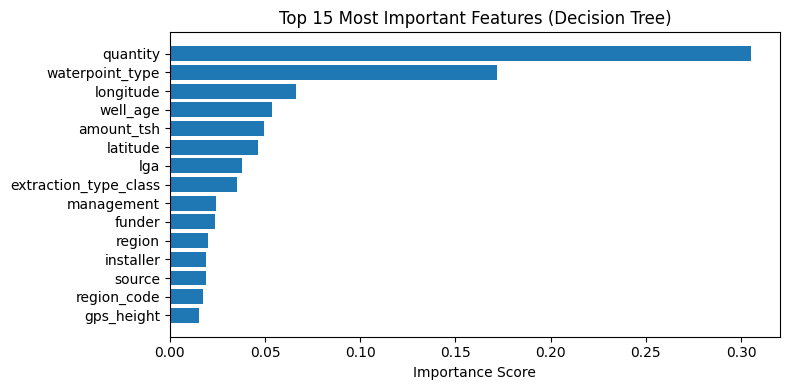

In [79]:
# visualizing top 15 feature importances
plt.figure(figsize=(8, 4))
plt.barh(
    importance_df.head(15)['Feature'],
    importance_df.head(15)['Importance']
)
plt.xlabel('Importance Score')
plt.title(f'Top 15 Most Important Features ({importance_label})')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Feature Importance Summary

The model is driven primarily by **quantity** and **waterpoint type**, which together account for a large share of the predictive power, indicating that water availability and infrastructure design are the strongest indicators of functionality. Geographic variables such as **longitude**, **latitude**, and **administrative location (LGA, region)** also play a significant role, highlighting the importance of location-specific factors in well performance.


## 6.2 Actionable Insights for Stakeholders

Based on feature importance, here are data-driven recommendations:

**Priority 1: Focus on High-Impact Factors**  
The top features-especially `quantity` and `waterpoint type`-drive most predictions, so monitoring and maintaining these should be the primary focus.

**Priority 2: Strengthen Data Collection**  
Ensure accurate, up-to-date data for critical variables such as `quantity`, `waterpoint type`, and `location`, as poor data quality directly reduces decision reliability.

**Priority 3: Preventive Maintenance**  
Use model signals to prioritize `older wells`, wells with `declining water quantity`, and those under `weak management` before failures occur.

**Priority 4: Geographic Targeting**  
Regional patterns suggest that some areas face systematic challenges; resources should be targeted toward `high-risk locations` to address root causes.

**Priority 5: Optimize Resource Allocation**  
Leverage predictions to focus budgets on wells likely to fail soon, enabling `early intervention` and reducing costly emergency repairs.


# 7. Predictions for Test Set

Generating Predictions

In [70]:
# Use scaled or unscaled data based on final model

# Decide if the final model uses scaled data
use_scaled = True if 'Logistic Regression' in final_model_name else False

if use_scaled:
    test_predictions_encoded = final_model.predict(X_test_scaled)
else:
    test_predictions_encoded = final_model.predict(X_test_final)

# Decode predictions back to original labels
test_predictions = target_encoder.inverse_transform(test_predictions_encoded)

print(f"Predictions generated for {len(test_predictions):,} wells")
print(f"\nPrediction Distribution:")
pred_counts = pd.Series(test_predictions).value_counts()
pred_pcts = pd.Series(test_predictions).value_counts(normalize=True) * 100
for status in pred_counts.index:
    print(f"  {status:25s}: {pred_counts[status]:5,} ({pred_pcts[status]:5.2f}%)")

Predictions generated for 14,850 wells

Prediction Distribution:
  functional               : 9,397 (63.28%)
  non functional           : 5,144 (34.64%)
  functional needs repair  :   309 ( 2.08%)


## 7.1 Create Submission File

The submission format requires two columns:
- **id**: Well identifier
- **status_group**: Predicted status (functional, functional needs repair, non functional)

In [71]:
# Create submission file
submission = pd.DataFrame({'id': test_values['id'],'status_group': test_predictions})

submission.to_csv('water_wells_predictions.csv', index=False)


In [72]:
predictions = pd.read_csv("water_wells_predictions.csv")
predictions.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional


In [73]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            14850 non-null  int64 
 1   status_group  14850 non-null  object
dtypes: int64(1), object(1)
memory usage: 232.2+ KB


In [75]:
predictions.shape

(14850, 2)

In [76]:
predictions["status_group"].value_counts()

status_group
functional                 9397
non functional             5144
functional needs repair     309
Name: count, dtype: int64

## 8. Business Recommendations

**1. Predictive Maintenance Program**  
Deploy the model to identify wells at risk of failure and prioritize preventive maintenance. This reduces emergency repairs, lowers costs, improves water access reliability, and enables more efficient resource allocation.

**2. Geographic Targeting Strategy**  
Focus maintenance resources on high-risk regions highlighted by the model. Create regional risk maps, investigate root causes (e.g., geology, installation quality), and allocate resources proportionally to problem areas.

**3. Enhanced Data Collection**  
Improve accuracy and consistency for key features such as `well age, water quantity, location, and management`. Implement standardized data collection protocols, train staff, and perform regular audits to maintain high-quality data.

**4. Well Lifecycle Management**  
Use well age and historical performance to plan maintenance and replacement schedules. Prioritize preventive care for mid-age wells to extend lifespan, smooth budgets, and reduce emergency interventions.

**5. Continuous Model Improvement**  
Treat the model as a living system: retrain regularly with new data, monitor prediction accuracy, incorporate new features, and adjust for biases. This ensures predictions remain accurate and adapt to changing conditions over time.
